
# Estimate the surface temperature of sun using the blackbody radiation law
## Chem 113, Spring 2021, Liang Shi

Blackbod radiation law (Planck's law):

$$d\rho(\nu,T) = \frac{8\pi h}{c^3} \frac{\nu^3 d\nu}{e^{\beta h\nu}-1}$$ 						

If wavelength is used instead of frequency, we have

$$ d\rho(\lambda,T) =  \frac{8\pi h c}{\lambda^5} \frac{d\lambda}{e^{\beta hc/\lambda}-1} $$

Derivation:

If the photon frequency is $E_n = nh\nu$, $n=0,1,2,...$, the partition function for each photon is 

$$ q = \sum_{n=0}^\infty e^{-\beta E_n} = \sum_{n=0}^\infty e^{-n \beta h \nu} = \sum_{n=0}^\infty \left( e^{-\beta h \nu} \right)^n = \frac{1}{1-e^{-\beta h\nu}},$$

where I have use the geometric series $\sum_{n=0}^\infty x^n = 1/(1-x)$. Now we calculate the average energy of the photon:

$$ \langle E(\nu) \rangle = -\left( \frac{\partial \ln q}{\partial \beta} \right)_{NV} = - \frac{\partial}{\partial \beta} [- \ln (1-e^{-\beta h\nu}) ] = \frac{ h \nu e^{-\beta h \nu}}{1-e^{-\beta h \nu}} = \frac{h\nu}{e^{\beta h \nu -1}} $$

Since the number of photons in the frequency interval $\nu$ and $\nu+d\nu$ is given by $8\pi \nu^2 d\nu/c^3$. The total radiant energy density between this frequency interval is given by

$$d\rho(\nu, T)  = \frac{8 \pi \nu d\nu}{c^3}\cdot \langle E(\nu)\rangle.$$

This concludes the derivation. (Note that we do not consider the quantum statistical nature of photon explicitly.) In doing fitting, we just take the  following functional form since  the radiation energy density is in arbitrary unit. 

$$ d\rho(\lambda,T) = \frac{A}{\lambda}\frac{1}{e^{\beta hc/\lambda}-1}.$$

Before fitting, let's sort out the unit of $\beta h c / \lambda = h c /\lambda k_B T$. $\lambda$ in the unit of nm, so if we use the standard SI units, there is another factor of $10^{-9}$ to include (another way is to express $c$ in the unit of nm/s). 


In [2]:
# load some libraries for numerical operations and plotting
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

Set the parameters first (*units are very important*)

In [3]:
# Parameters
h = 6.62607015e-34   # Planck's constant in m^2 kg / s
k = 1.38064852e-23   # Boltzmann constant in m^2 kg / (s^2 K)
c = 2.99792458e8     # speed of light in m / s

The original data is the synthetic Gueymard spectrum on https://www.nrel.gov/grid/solar-resource/spectra.html. We modified it so that students can use it with Excel.

In [4]:
a = np.array([1,2,3,4])
print(a[::2])

[1 3]


In [6]:
# Load the data 
# the exp data file has 2 columns (1st: wavelength in nm; 2nd: radiation energy density)
exp0 = np.loadtxt('newguey2003_truncated.txt')
exp = exp0[::50,:]
np.savetxt("newguey2003_modified.txt", exp)

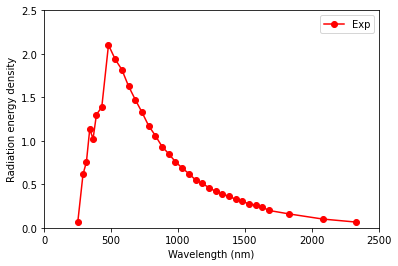

In [8]:
exp = np.loadtxt('newguey2003_modified.txt')
nm_exp = exp[:,0] # the 1st column is the wavelength in nm
en_exp = exp[:,1] # the 2nd column is the radiation energy density in arbitrary unit

# take a look at the data
plt.plot(nm_exp, en_exp, 'r-o', label="Exp")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiation energy density')
plt.xlim((0,2500))
plt.ylim((0,2.5))
plt.legend()
plt.show()

In [29]:
# Planck's law
def planck(nm, a, T):
    '''
    nm: wavelength in nm
    a:  prefactor
    '''
    return a/nm**5/(np.exp(h*c/(k*T*nm*1e-9))-1)

popt, pcov = curve_fit(planck, nm_exp, en_exp, [1e16, 6000.0])
a = popt[0]
T = popt[1]
print("Surface temperature of the sun (K):", T)

Surface temperature of the sun (K): 5525.42432630576


In [30]:
# compute predicted radiation energy density from fitting
en_fit = planck(nm_exp,*popt)

Plot the results and compare them

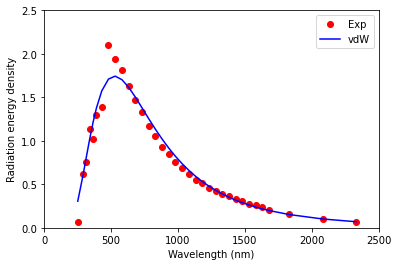

In [31]:
plt.plot(nm_exp, en_exp, 'ro', label="Exp")
plt.plot(nm_exp, en_fit, 'b-', label="vdW")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiation energy density')
plt.xlim((0,2500))
plt.ylim((0,2.5))
plt.legend()
plt.show()

From our simple fitting, we estimate the surface temperature of the sun is about 5525 K. NASA website (https://www.nasa.gov/sun) shows the surface temperature is 10000 F, which is 5811 K. Our simple estimation is pretty good.